# Trabalho de Física Computacional
Aluno: Wagner Martins de Lima Filho

## Lendo informações

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = np.genfromtxt("./marsexpress.dat", delimiter="  ")

## Problema 1
a) Transforme a unidade das posições de km para UA (1 AU = 143598000km)

In [ ]:
t = df[:,0]
x = df[:,1]
y = df[:,2]

x_AU = x/143598000
y_AU = y/143598000

print(x_AU)
print(y_AU)

b) A partir dos dados, faça um gráfico da trajetória da sonda (y _versus_ x)

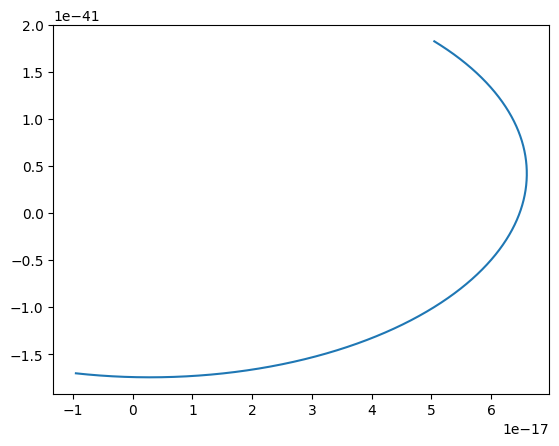

In [89]:
[fig] = plt.plot(x,y)
fig.set_label('test')
plt.show()

c) Calcule e faça o gráfico da velocidade da sonda em função do tempo.